# Real Estate Clean up

This is a real dataset and it was downloaded using web scraping techniques. The data contains registers from fotocasa which is one of the most popular websites of real estate in Spain. Please, do not do this (web scraping) unless it is for academic purposes.

The dataset was downloaded a few years ago by Henry Navarro and In no case were economic returns obtained from it.

It contains thousands of data from real houses published on the web www.fotocasa.com. Your goal is to extract as much information as possible with the knowledge you have so far about data science, for example what is the most expensive house in the entire dataset?

Let's start with precisely that question... Good luck!

#### 0. Read the dataset assets/real_estate.csv and try to visualize the table (★☆☆)

In [1]:
import pandas as pd

# this CSV file contains semicolons instead of comas as separator
ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds = ds[["isNew", "rooms", "bathrooms", "surface", "price", "date", "level5"]]
ds.head(10)

,isNew,rooms,bathrooms,surface,price,date,level5
0,False,3.0,2.0,103.0,195000,2019-12-28T18:27:15.9975027Z,Arganda del Rey
1,False,3.0,1.0,NaN,89000,2019-12-28T18:27:15.9975027Z,Fuenlabrada
2,False,2.0,2.0,99.0,390000,2019-12-28T18:27:15.9975027Z,Boadilla del Monte
3,False,3.0,1.0,86.0,89000,2019-12-28T18:27:15.9975027Z,Fuenlabrada
4,False,2.0,2.0,106.0,172000,2019-12-28T18:27:15.9975027Z,Arganda del Rey
5,False,2.0,1.0,70.0,315000,2019-12-28T18:27:15.9680547Z,Las Rozas de Madrid
6,False,3.0,2.0,145.0,430000,2019-12-28T18:27:15.9680547Z,Las Rozas de Madrid
7,False,2.0,1.0,95.0,275000,2019-12-28T18:27:15.9680547Z,Las Rozas de Madrid
8,False,4.0,3.0,277.0,445000,2019-12-28T18:27:15.9680547Z,Las Rozas de Madrid
9,False,4.0,2.0,129.0,350000,2019-12-28T13:30:00Z,Madrid Capital


#### 1. Change the datatype of the columns of the DataFrame as the following (★☆☆)

| Column | Data type |
| -------| --------- |
| isNew | Boolean |
| rooms | Integer |
| bathrooms | Integer |
| surface | Float |
| price | Integer |
| date | String format %Y-%m-%d %H:%M:%S |
| level5 | String |

Ensure the current datatype of the columns match the desired and, if not, update it.

In [2]:
# TODO
ds["rooms"] = ds["rooms"].fillna(0).astype(int)
ds["bathrooms"] = ds["bathrooms"].fillna(0).astype(int)
ds['date'] = ds['date'].fillna('').astype(str)
ds['date'] = pd.to_datetime(ds['date'], format='ISO8601')
ds['date'] = ds['date'].dt.strftime('%Y-%m-%d %H:%M:%S')
ds['level5'] = ds['level5'].fillna('').astype(str)

ds = ds.dropna()

print(ds)

       isNew  rooms  bathrooms  surface   price                 date  \
0      False      3          2    103.0  195000  2019-12-28 18:27:15   
2      False      2          2     99.0  390000  2019-12-28 18:27:15   
3      False      3          1     86.0   89000  2019-12-28 18:27:15   
4      False      2          2    106.0  172000  2019-12-28 18:27:15   
5      False      2          1     70.0  315000  2019-12-28 18:27:15   
...      ...    ...        ...      ...     ...                  ...   
15330  False      2          1     96.0  259470  2019-12-17 18:19:00   
15331  False      3          1    150.0  165000  2019-12-17 18:19:00   
15332  False      4          2    175.0  495000  2019-12-17 18:19:00   
15333  False      3          2    101.0  195000  2019-12-17 18:18:00   
15334  False      3          2    152.0  765000  2019-12-17 18:17:00   

                       level5  
0             Arganda del Rey  
2          Boadilla del Monte  
3                 Fuenlabrada  
4      

#### 2. Create an "id_house" column which will be the index for each record of the Dataset (★☆☆)

Use an Integer number which refers to a record within the Database.

In [3]:
import pandas as pd

ds["id_house"] = ds.index

ds.set_index('id_house', inplace=True)


print(ds)

          isNew  rooms  bathrooms  surface   price                 date  \
id_house                                                                  
0         False      3          2    103.0  195000  2019-12-28 18:27:15   
2         False      2          2     99.0  390000  2019-12-28 18:27:15   
3         False      3          1     86.0   89000  2019-12-28 18:27:15   
4         False      2          2    106.0  172000  2019-12-28 18:27:15   
5         False      2          1     70.0  315000  2019-12-28 18:27:15   
...         ...    ...        ...      ...     ...                  ...   
15330     False      2          1     96.0  259470  2019-12-17 18:19:00   
15331     False      3          1    150.0  165000  2019-12-17 18:19:00   
15332     False      4          2    175.0  495000  2019-12-17 18:19:00   
15333     False      3          2    101.0  195000  2019-12-17 18:18:00   
15334     False      3          2    152.0  765000  2019-12-17 18:17:00   

                        

#### 3. Using SQLAlchemy, create a SQLite Database and insert all the above records into it (★★☆)

Initialize both the connection and the Database and then define the datatype. Use the previous created variable (`id_house`) as the primary key of the Table.

**Hint**: You can choose between use `sqlalchemy` or `flask_sqlalchemy` Python package as shown previously.

In [4]:
# TODO
import sqlalchemy as db
from sqlalchemy import Table, Column, Integer, Boolean, Float, Date, String

# Create the engine, the instance of the Database
engine = db.create_engine('sqlite:///real1.sqlite')

# Load the Metadata of the Database for managing and accessing tables
meta = db.MetaData()

# Create the connection object
con = engine.connect()

# Create the table
Realestate = Table('real', meta,
   Column('id_house', Integer, primary_key=True, autoincrement=True),
   Column('isNew', Boolean),
   Column('rooms', Integer),
   Column('bathrooms', Integer),
   Column('surface', Float),
   Column('price', Integer),
   Column('date', String),
   Column('level5', String)
)

# Create the table or tables defined in the Database
meta.create_all(engine)

# For Loop to insert the Data from the DF into SQL
col_list = ['isNew', 'rooms', 'bathrooms', 'surface', 'price', 'date', 'level5']

query = db.insert(Realestate)
values_list = [{col: row[col] for col in col_list} for _, row in ds.iterrows()]

con.execute(query, values_list)




#### 4. Select the houses that are more expensive than the overall average price (★★☆)

Implement first the SQL Query and then the filter over the Pandas DataFrame and then check the obtained results are the same.

**Hint**: You could calculate the mean of prices of all houses before filtering.

In [5]:
# SQL Query TODO
'''SELECT *
FROM ds
WHERE price > (SELECT AVG(price) FROM ds);'''

# Pandas DataFrame filter TODO
import pandas as pd
import numpy as np

average_all = ds['price'].mean()
print(f"Precio medio general: {average_all:.0f} euros.\n")

expensive_houses = ds[ds['price'] > average_all]
for index, row in expensive_houses.iterrows():
    house_name = row['level5']
    price = row['price']
    print(f"-LUGAR: {house_name}\n-PRECIO: {price} euros.\n")

Precio medio general: 487488 euros.

-LUGAR: Villaviciosa de Odón
-PRECIO: 540000 euros.

-LUGAR:  Madrid Capital
-PRECIO: 885000 euros.

-LUGAR: Pozuelo de Alarcón
-PRECIO: 550000 euros.

-LUGAR: San Sebastián de los Reyes
-PRECIO: 530000 euros.

-LUGAR: Rivas-vaciamadrid
-PRECIO: 559000 euros.

-LUGAR:  Madrid Capital
-PRECIO: 790000 euros.

-LUGAR:  Madrid Capital
-PRECIO: 559000 euros.

-LUGAR:  Madrid Capital
-PRECIO: 890000 euros.

-LUGAR:  Madrid Capital
-PRECIO: 1995000 euros.

-LUGAR:  Madrid Capital
-PRECIO: 1380000 euros.

-LUGAR: Becerril de la Sierra
-PRECIO: 495000 euros.

-LUGAR:  Madrid Capital
-PRECIO: 3500000 euros.

-LUGAR:  Madrid Capital
-PRECIO: 915000 euros.

-LUGAR:  Madrid Capital
-PRECIO: 693150 euros.

-LUGAR:  Madrid Capital
-PRECIO: 611600 euros.

-LUGAR:  Madrid Capital
-PRECIO: 883630 euros.

-LUGAR:  Madrid Capital
-PRECIO: 695900 euros.

-LUGAR:  Madrid Capital
-PRECIO: 899000 euros.

-LUGAR:  Madrid Capital
-PRECIO: 836650 euros.

-LUGAR:  Madrid Capit

#### 5. Is it correct to assume that the mean surface of ​​all houses is not 97.5 meters? Prove it taking a random sample of the Dataset (★★★)

Randomly select a sample which represents the 20% of the Dataset and then test and prove the hypothesis. Returns the evidence for rejecting or accepting the hypothesis.

In [7]:
import pandas as pd
import numpy as np

# Set the seed for reproducibility
np.random.seed(1)

# Take a random sample representing 20% of the dataset
sample_size = int(len(ds) * 0.2)
sample = ds.sample(n=sample_size)

# Calculate the mean surface of the sample
sample_mean = sample['surface'].mean()

# Hypothesized value
hypothesized_value = 97.5

# Perform the hypothesis test
alpha = 0.05  # significance level

# Two-tailed t-test
from scipy.stats import ttest_1samp

t_statistic, p_value = ttest_1samp(sample['surface'], hypothesized_value)

# Check the p-value against the significance level
if p_value < alpha:
    print("Rechaza hipotesis nula.")
else:
    print("Acepta hipotesis nula.")

print(f"Superficie media de la muestra: {sample_mean:.2f} metros")
print(f"Valor hipotetizado: {hypothesized_value} metros/media superficie")
print(f"P-value: {p_value:.4f}")


Rechaza hipotesis nula.
Superficie media de la muestra: 174.72 metros
Valor hipotetizado: 97.5 metros/media superficie
P-value: 0.0000


#### 6. How are the variables distributed? Plot in one graph several box plots, one for the following column: `rooms`, `bathrooms`, `surface` and `price`. 

Describe what can be observed about the data in each column: quartiles, median, outliers...

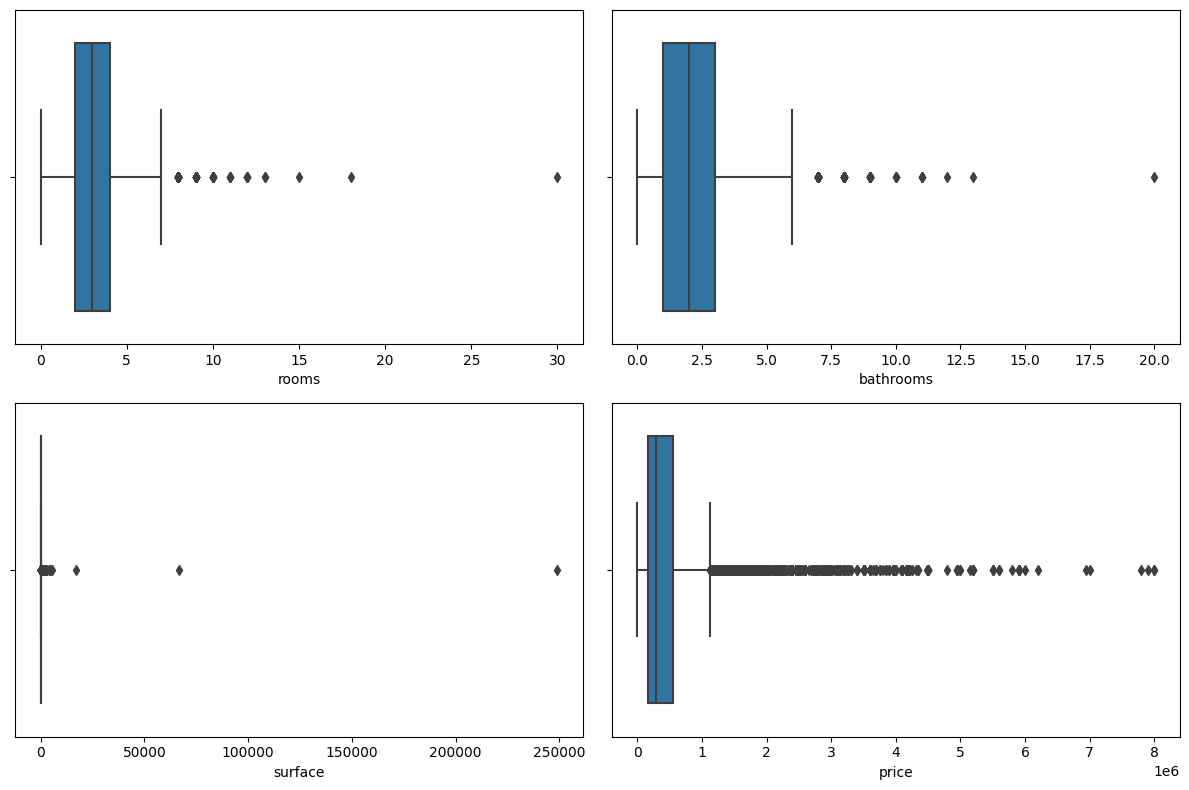

In [8]:
# TODO
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns for box plots
columns = ['rooms', 'bathrooms', 'surface', 'price']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Iterate over the columns and create box plots
for i, column in enumerate(columns):
    row = i // 2
    col = i % 2
    sns.boxplot(x=ds[column], ax=axes[row, col])
    axes[row, col].set_xlabel(column)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()